In [1]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from src import data_loader

In [2]:
# Load a single file
aep = data_loader.load_single_file("../data/raw/AEP_hourly.csv")
print(aep.head())

# Load all into a dictionary
dfs = data_loader.load_all_data("../data/raw")
print("=====================================================")
print(dfs.keys())  # -> ['AEP_hourly', 'COMED_hourly', ...]

# Load all concatenated into a single DataFrame
df_all = data_loader.load_concatenated("../data/raw")
print("=====================================================")
print(df_all.head())
print("-----------------------------------------------------")
print(df_all["region"].unique())

                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0
dict_keys(['AEP_hourly', 'COMED_hourly', 'DAYTON_hourly', 'DEOK_hourly', 'DOM_hourly', 'DUQ_hourly', 'EKPC_hourly', 'FE_hourly', 'NI_hourly', 'PJME_hourly', 'PJMW_hourly', 'pjm_hourly_est', 'PJM_Load_hourly'])
                      AEP_MW      region  COMED_MW  DAYTON_MW  DEOK_MW  \
Datetime                                                                 
2004-10-01 01:00:00  12379.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 02:00:00  11935.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 03:00:00  11692.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 04:00:00  11597.0  AEP_hourly       NaN        NaN      NaN   
2004-10-01 05:00:00  11681.0  AEP_hourly       NaN        NaN      NaN   

                     DOM_MW  DUQ_MW  EKPC_MW  FE_MW  NI_MW  ...  DEO

In [3]:
df=aep
print("Dataset from", df.index.min(), "to", df.index.max())
print("=====================================================")
print("Dataset info:")
print(df.describe())
print("=====================================================")
print("First values:")
print(df.head())
print("=====================================================")
print("More info:")
print(df.info())

Dataset from 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Dataset info:
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000
First values:
                      AEP_MW
Datetime                    
2004-10-01 01:00:00  12379.0
2004-10-01 02:00:00  11935.0
2004-10-01 03:00:00  11692.0
2004-10-01 04:00:00  11597.0
2004-10-01 05:00:00  11681.0
More info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-10-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None


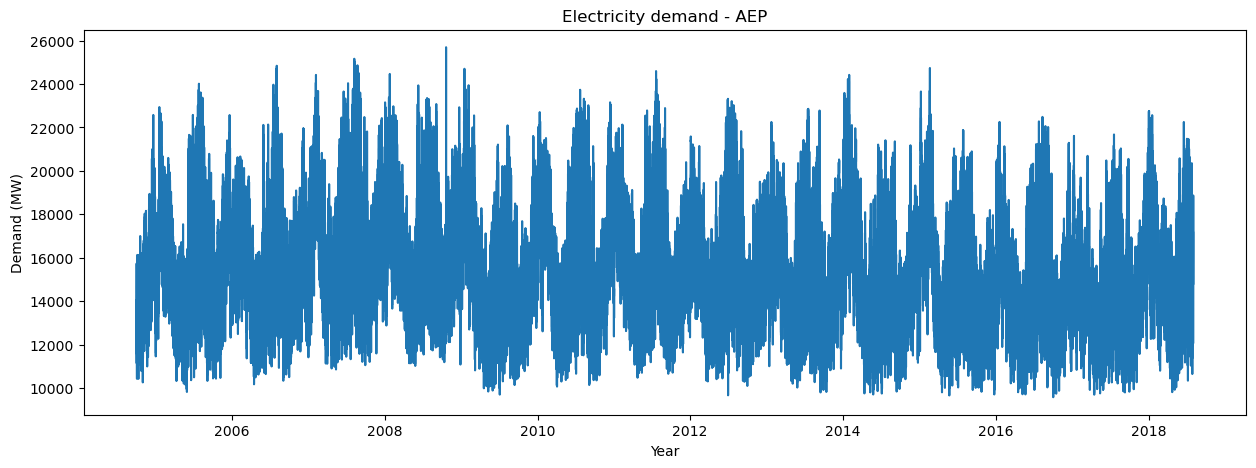

In [4]:
plt.figure(figsize=(15,5))
plt.plot(df)
plt.title("Electricity demand - AEP")
plt.xlabel("Year")
plt.ylabel("Demand (MW)")
plt.show()

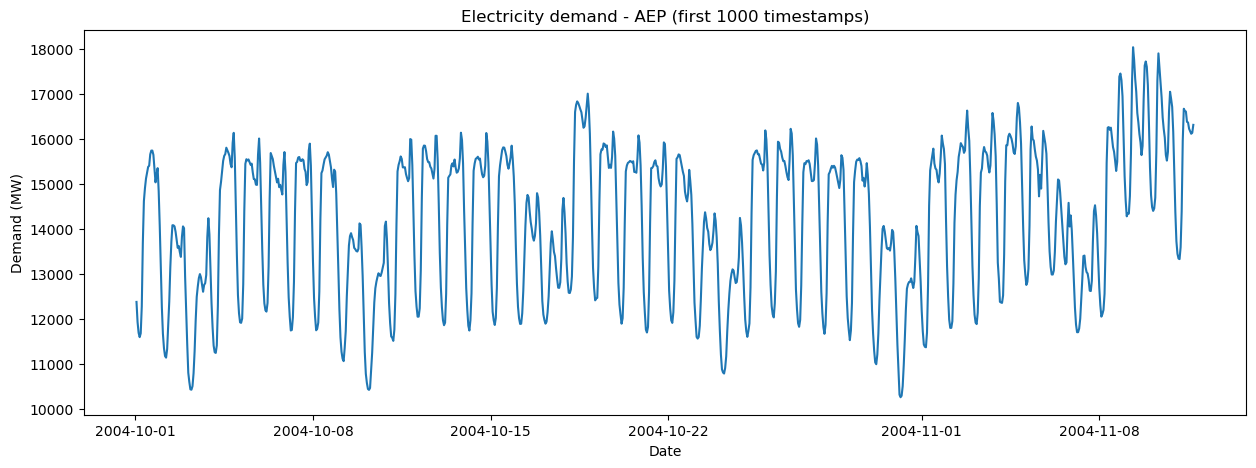

In [5]:
plt.figure(figsize=(15,5))
plt.plot(df[:1000])
plt.title("Electricity demand - AEP (first 1000 timestamps)")
plt.xlabel("Date")
plt.ylabel("Demand (MW)")
plt.show()

In [6]:
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month


<Axes: title={'center': 'Average demand by month'}, xlabel='month'>

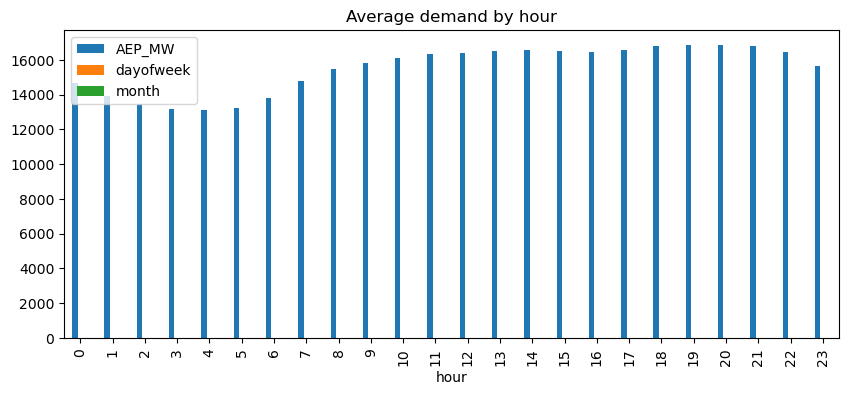

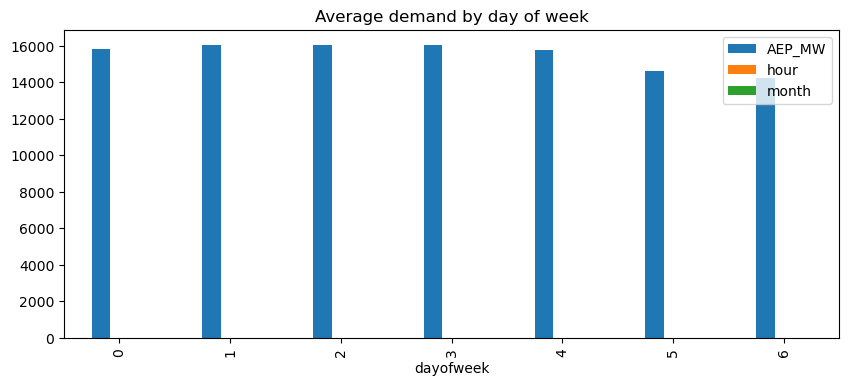

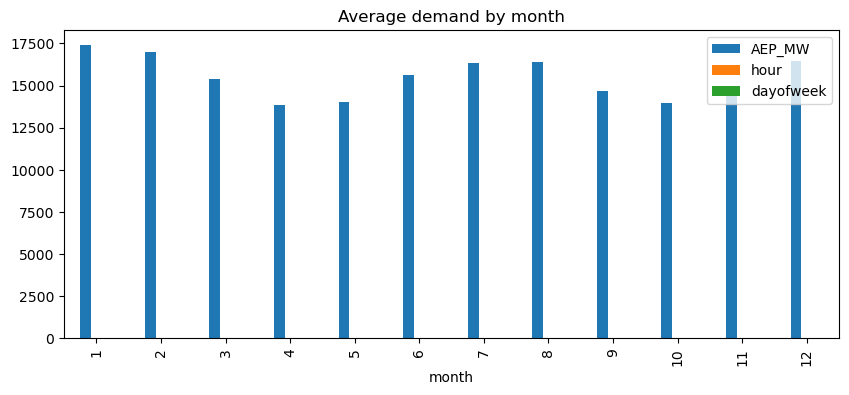

In [7]:
# Average demands
df.groupby("hour").mean().plot(kind="bar", figsize=(10,4), title="Average demand by hour")
df.groupby("dayofweek").mean().plot(kind="bar", figsize=(10,4), title="Average demand by day of week")
df.groupby("month").mean().plot(kind="bar", figsize=(10,4), title="Average demand by month")